In [1]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
# 2. Load the Dataset
df = pd.read_excel('students_performance_dataset.xlsx')
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (300, 20)


In [4]:
# 3. Initial Data Inspection
print("\nDataset Overview (First 5 Rows):")
display(df.head())
    
print("\nDataset Info:")
df.info()
    
print(f"\nMissing values:")
print(df.isnull().sum())
    
print(f"\nSummary & Statistics:")
display(df.describe())


Dataset Overview (First 5 Rows):


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Final_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.273491,69.601451,64.102933,54518.876589,6.993096,1.670011,5.468870,5.763599,5.402980,4.436667,41.454265
std,11.844562,17.480853,20.456827,24845.101039,1.734910,0.840759,2.559495,2.476379,2.588179,2.751586,9.989541
min,0.202463,40.681219,30.324242,10111.301178,4.012623,0.101284,1.018167,1.048115,1.045239,0.000000,17.916539
25%,9.871826,54.364955,45.966283,32842.034240,5.450614,0.953231,3.226739,4.106060,3.147787,2.000000,34.401047
50%,21.528196,69.299178,64.715015,56120.473769,7.144770,1.735533,5.536846,5.873572,5.171520,4.000000,41.596899
75%,30.146774,84.850333,81.261818,74997.618701,8.417073,2.436196,7.683439,7.751822,7.758593,7.000000,48.210497
max,39.620206,99.983060,99.781198,99593.244163,9.998283,2.998452,9.995895,9.902960,9.978605,9.000000,67.295712


In [5]:
# 4. Drop Irrelevant Columns
df = df.drop('Student_ID', axis=1)
print("Dropped 'Student_ID' column.")

Dropped 'Student_ID' column.


In [6]:
# 5. Encode Categorical Features
le = LabelEncoder()
df_encoded = df.copy()

categorical_features = [
    'Gender', 
    'Parental_Education', 
    'Internet_Access', 
    'Tutoring_Classes',
    'Sports_Activity', 
    'Extra_Curricular', 
    'School_Type', 
    'Teacher_Feedback'
]

In [7]:
for col in categorical_features:
    new_col_name = f"{col}_Encoded"
    df_encoded[new_col_name] = le.fit_transform(df_encoded[col])
    print(f"Encoded '{col}' into '{new_col_name}'")
    
df_processed = df_encoded.drop(categorical_features, axis=1)

print("\nProcessed Data (First 5 Rows)")
display(df_processed.head())

Encoded 'Gender' into 'Gender_Encoded'
Encoded 'Parental_Education' into 'Parental_Education_Encoded'
Encoded 'Internet_Access' into 'Internet_Access_Encoded'
Encoded 'Tutoring_Classes' into 'Tutoring_Classes_Encoded'
Encoded 'Sports_Activity' into 'Sports_Activity_Encoded'
Encoded 'Extra_Curricular' into 'Extra_Curricular_Encoded'
Encoded 'School_Type' into 'School_Type_Encoded'
Encoded 'Teacher_Feedback' into 'Teacher_Feedback_Encoded'

Processed Data (First 5 Rows)


,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Final_Score,Gender_Encoded,Parental_Education_Encoded,Internet_Access_Encoded,Tutoring_Classes_Encoded,Sports_Activity_Encoded,Extra_Curricular_Encoded,School_Type_Encoded,Teacher_Feedback_Encoded
0,36.330635,86.628815,38.182863,32727.500387,6.777112,2.488956,4.526416,1.698767,9.416549,4,44.293533,1,2,0,0,1,0,0,2
1,9.582476,73.504255,95.788249,42332.567312,6.631231,2.192993,5.920305,8.459841,4.382245,4,42.749974,0,1,0,0,1,0,0,1
2,5.795795,65.453321,73.939564,44142.273093,5.311059,0.887486,5.788195,4.140011,7.373097,5,29.846049,1,1,1,0,0,1,0,1
3,19.578110,94.381263,53.443393,64498.434188,6.380781,1.267095,6.313880,5.694395,5.281190,6,44.030395,1,0,1,0,0,1,0,2
4,39.426018,46.671849,39.749045,42105.884774,4.266327,0.397970,1.551979,8.150371,7.069597,6,42.548877,1,2,0,0,0,1,0,3


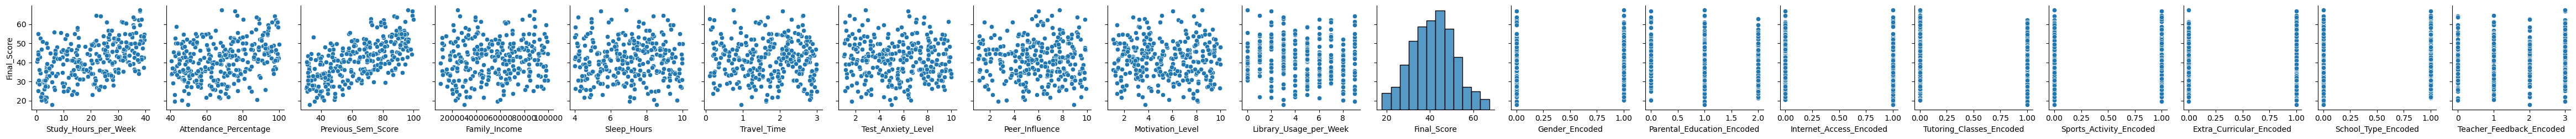

In [8]:
# 6. Pairplot Visualization
sns.pairplot(df_processed, x_vars=df_processed.columns, y_vars='Final_Score')
plt.show()

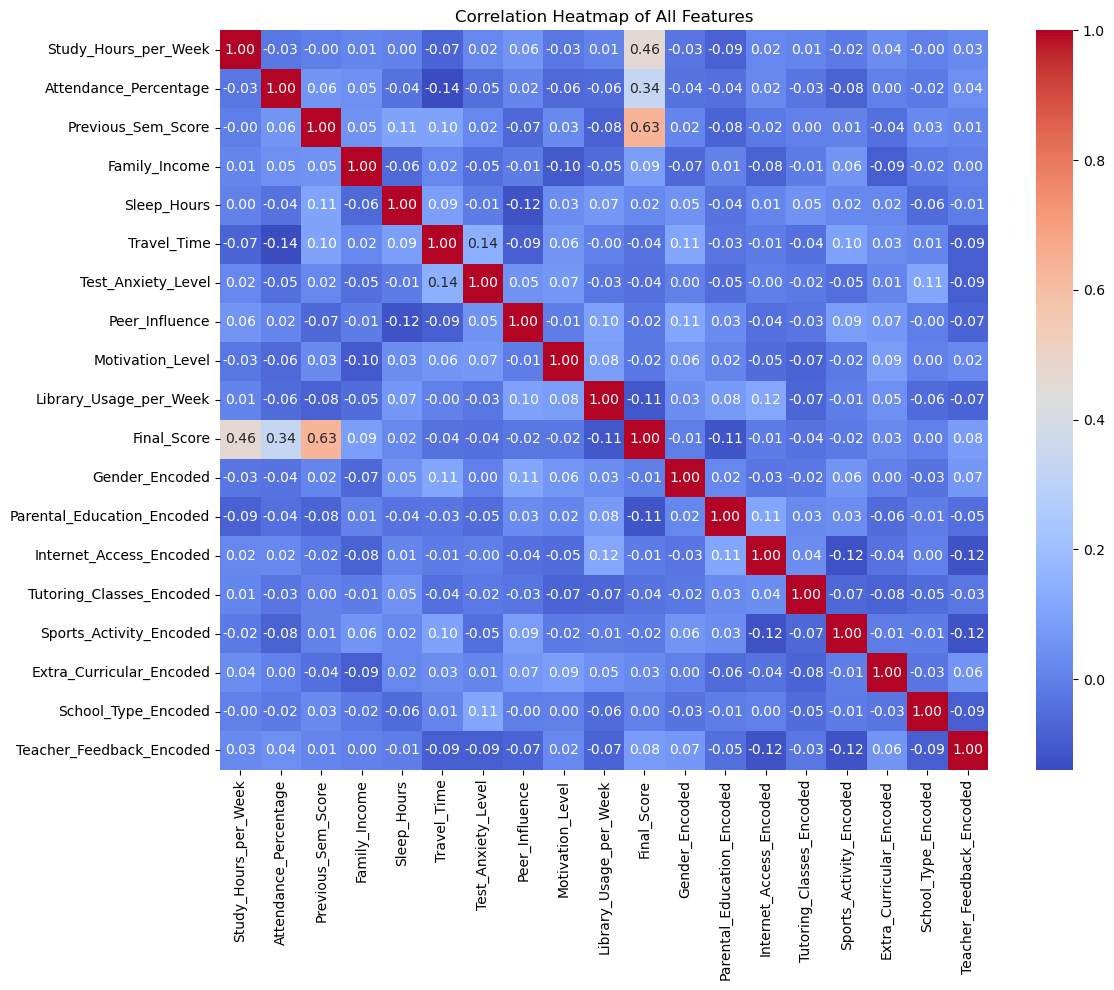


--- Correlation with 'Final_Score' ---
Final_Score                   1.000000
Previous_Sem_Score            0.632940
Study_Hours_per_Week          0.464599
Attendance_Percentage         0.335473
Family_Income                 0.090093
Teacher_Feedback_Encoded      0.079710
Extra_Curricular_Encoded      0.025958
Sleep_Hours                   0.021040
School_Type_Encoded           0.001950
Gender_Encoded               -0.005002
Internet_Access_Encoded      -0.013847
Sports_Activity_Encoded      -0.017446
Motivation_Level             -0.020367
Peer_Influence               -0.024590
Tutoring_Classes_Encoded     -0.035658
Travel_Time                  -0.037715
Test_Anxiety_Level           -0.042936
Library_Usage_per_Week       -0.111752
Parental_Education_Encoded   -0.113122
Name: Final_Score, dtype: float64


In [9]:
# 7. Correlation Analysis
plt.figure(figsize=(12, 10))
corr_matrix = df_processed.corr()
corr_heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.savefig('correlation_heatmap_all.png')
plt.tight_layout()
plt.show()

print("\n--- Correlation with 'Final_Score' ---")
target_corr = corr_matrix['Final_Score'].sort_values(ascending=False)
print(target_corr)

In [10]:
# 8. Define Features (X) and Target (y)
y = df_processed['Final_Score']
X = df_processed.drop('Final_Score', axis=1)

feature_names = X.columns.tolist()

print(f"Target variable 'y' shape: {y.shape}")
print(f"Features 'X' shape: {X.shape}")
print(f"Total features for selection: {len(feature_names)}")

Target variable 'y' shape: (300,)
Features 'X' shape: (300, 18)
Total features for selection: 18


In [11]:
# 8. Split Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set:   {X_train.shape} features, {y_train.shape} target")
print(f"Test set: {X_test.shape} features, {y_test.shape} target")

Training set:   (240, 18) features, (240,) target
Test set: (60, 18) features, (60,) target


In [12]:
# 9. Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")
print(f"Scaled training data shape: {X_train_scaled.shape}")

Data scaled successfully.
Scaled training data shape: (240, 18)


In [13]:
# 10. Feature Selection
K = 10
selector = SelectKBest(score_func=f_regression, k=K)

X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

print(f"Selected top {K} features.")
print(f"Selected train data shape: {X_train_selected.shape}")
print(f"Selected test data shape: {X_test_selected.shape}")

selected_mask = selector.get_support()
selected_features = [name for name, selected in zip(feature_names, selected_mask) if selected]

print(f"\nTop {K} Selected Features")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

Selected top 10 features.
Selected train data shape: (240, 10)
Selected test data shape: (60, 10)

Top 10 Selected Features
1. Study_Hours_per_Week
2. Attendance_Percentage
3. Previous_Sem_Score
4. Travel_Time
5. Test_Anxiety_Level
6. Peer_Influence
7. Library_Usage_per_Week
8. Parental_Education_Encoded
9. Sports_Activity_Encoded
10. Teacher_Feedback_Encoded


In [14]:
# 11. Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train_selected, y_train)

print("Model is trained successfully!")

Model is trained successfully!


In [15]:
# 12. Make Predictions
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

print("Predictions made for train and test sets.")

Predictions made for train and test sets.


In [16]:
# 13. Evaluate Model Performance

def check_metrics(y_true, y_pred, set_name=""):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n--- {set_name} Metrics ---")
    print(f"  R-Squared (R2): {r2:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    return {'R2': r2, 'RMSE': rmse}

train_metrics = check_metrics(y_train, y_pred_train, "Training")
test_metrics = check_metrics(y_test, y_pred_test, "Test")


--- Training Metrics ---
  R-Squared (R2): 0.7415
  Mean Squared Error (MSE): 25.7114
  Root Mean Squared Error (RMSE): 5.0706
  Mean Absolute Error (MAE): 4.0862

--- Test Metrics ---
  R-Squared (R2): 0.6101
  Mean Squared Error (MSE): 36.5942
  Root Mean Squared Error (RMSE): 6.0493
  Mean Absolute Error (MAE): 4.8672


In [17]:
# 14. Overfitting Check
print("\nOverfitting Check")
r2_diff = train_metrics['R2'] - test_metrics['R2']
print(f"R² difference (Train - Test): {r2_diff:.4f}")

if abs(r2_diff) < 0.1:
    print("Model appears to generalize well (low overfitting).")
else:
    print("Potential overfitting detected (R2 gap is high).")


Overfitting Check
R² difference (Train - Test): 0.1313
Potential overfitting detected (R2 gap is high).


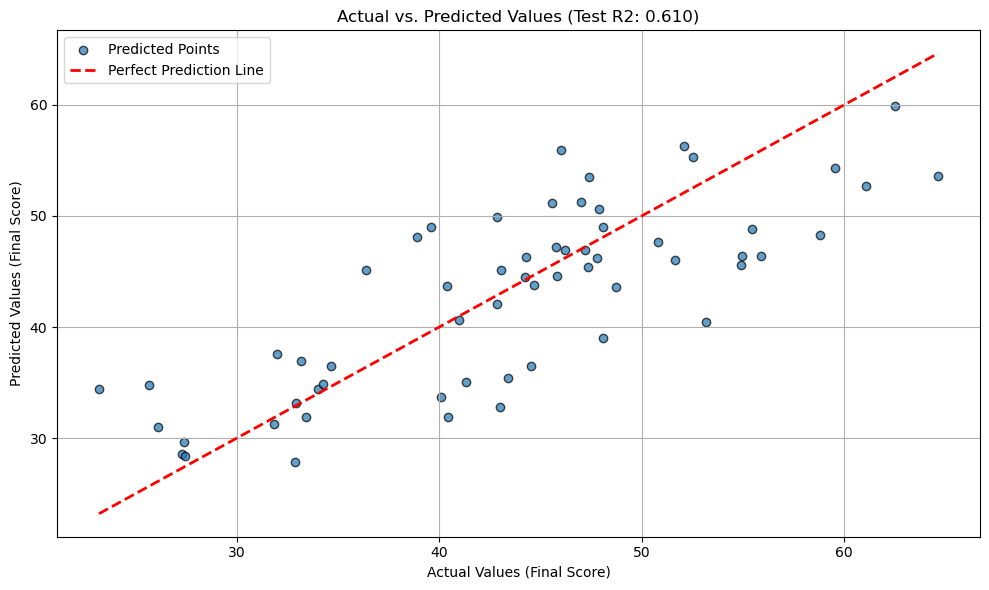

In [18]:
# 15. Visualization: Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k', label='Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values (Final Score)')
plt.ylabel('Predicted Values (Final Score)')
plt.title(f'Actual vs. Predicted Values (Test R2: {test_metrics["R2"]:.3f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36724\2506474942.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


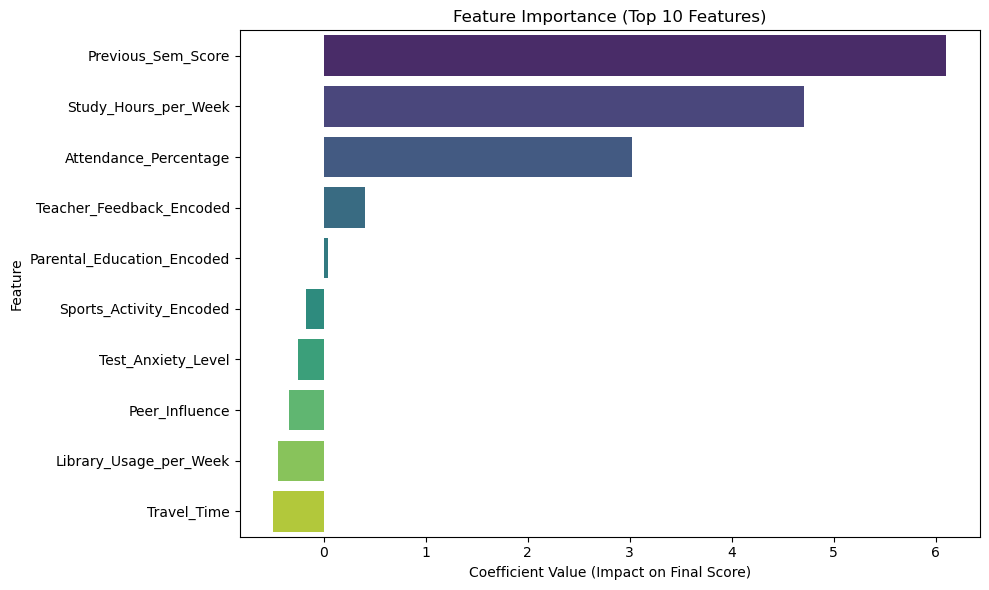

In [19]:
# 16. Visualization: Feature Importance
coefficients = model.coef_

feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title(f'Feature Importance (Top {K} Features)')
plt.xlabel('Coefficient Value (Impact on Final Score)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

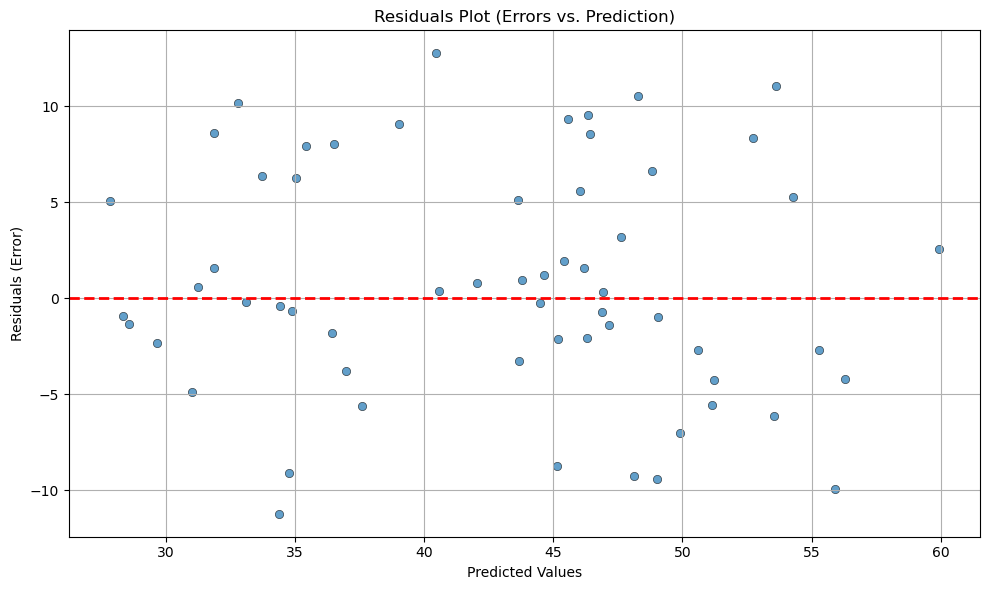


--- Script Finished ---
All plots saved as .png files.


In [20]:
# 17. Visualization: Residuals Plot

residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Error)')
plt.title('Residuals Plot (Errors vs. Prediction)')
plt.grid(True)
plt.tight_layout()
plt.savefig('residuals_plot.png')
plt.show()

print("\n--- Script Finished ---")
print("All plots saved as .png files.")